In [110]:
import torch

Create a random tensor with shape (8, 8).

In [111]:
random_tensor = torch.rand(8, 8)

Perform a matrix multiplication on the tensor from point 1 with another random tensor with shape (1,8) (hint: you may have to transpose the second tensor).

In [112]:
random_tensor2 = torch.rand(1,8)
matmultedTensors = random_tensor @ random_tensor2.T
print(matmultedTensors)


tensor([[1.8996],
        [1.5010],
        [1.6272],
        [3.1464],
        [2.2297],
        [3.0736],
        [2.7090],
        [1.8921]])


Set the random seed to 0 and do exercises points 1 & 2 over again.

In [113]:
torch.random.manual_seed(0)
random_tensor = torch.rand(8, 8)
random_tensor2 = torch.rand(1,8)
matmultedTensors = random_tensor @ random_tensor2.T

print(matmultedTensors)
matmultedTensors.shape

tensor([[2.0579],
        [1.4392],
        [2.9189],
        [1.9295],
        [1.7499],
        [1.5325],
        [2.7487],
        [2.2421]])


torch.Size([8, 1])

Create two random tensors of shape (2, 3).

In [114]:
random_tensor = torch.rand(2, 3)
random_tensor2 = torch.rand(2, 3)

Perform a matrix multiplication on the tensors you created in point 4 (again, you may have to adjust the shapes of one of the tensors).

In [115]:
matmultedTensors = random_tensor @ random_tensor2.T
print(matmultedTensors)

matmultedTensors.shape

tensor([[0.5833, 1.4636],
        [0.6283, 1.4165]])


torch.Size([2, 2])

Find the maximum and minimum index values of the output of point 5. What do you notice?


In [116]:
print(matmultedTensors.argmax())
print(matmultedTensors.argmin())

#Flattens out the tensor to something  like an array and picks the index for that

matmultedTensors[:,0]

tensor(1)
tensor(0)


tensor([0.5833, 0.6283])

Make a random tensor with shape (1, 1, 1, 12) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (12). Print out the first tensor and its shape, as well as the second tensor and its shape.

In [117]:
random_tensor = torch.rand(1, 1, 1 , 12)
print(random_tensor)
print(random_tensor.shape)

random_tensor_ones_removed = random_tensor.squeeze()
print(random_tensor_ones_removed)
print(random_tensor_ones_removed.shape)


tensor([[[[0.5936, 0.4158, 0.4177, 0.2711, 0.6923, 0.2038, 0.6833, 0.7529,
           0.8579, 0.6870, 0.0051, 0.1757]]]])
torch.Size([1, 1, 1, 12])
tensor([0.5936, 0.4158, 0.4177, 0.2711, 0.6923, 0.2038, 0.6833, 0.7529, 0.8579,
        0.6870, 0.0051, 0.1757])
torch.Size([12])


Assignment 1.2: Building a multi-class PyTorch model

Create a multi-class dataset using the spirals data creation function from CS231n. See attached Python script “CS231n-spiral-generator.py” CS231n-spiral-generator.py. Create data with 3 classes at least 200 points per class with 2 dimensions. Split data on training and testing set so that you use 20 % of data for testing.

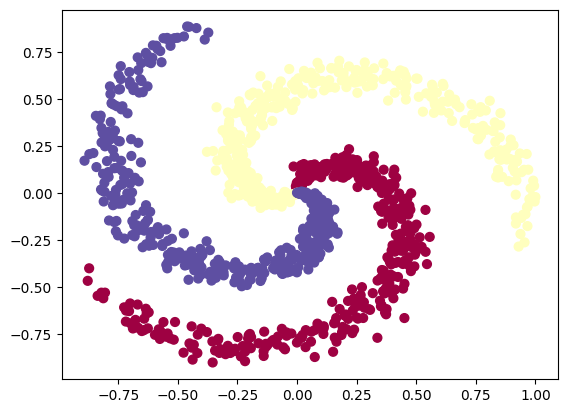

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

N = 400 #Number of points per class
C = 3
D = 2
X = np.zeros((N*C, D))
y = np.zeros(N*C, dtype='uint8')
for i in range(C):
    ix = range(N*i, N*(i+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(i*4, (i+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = i

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


X = torch.from_numpy(X).type(torch.float)

y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#len(X_train), len(X_test), len(y_train), len(y_test)


Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

In [119]:
from torch import nn
class SpiralModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(), 
            nn.Linear(in_features=8, out_features=8),
            nn.ReLU(), 
            nn.Linear(in_features=8, out_features=3) 
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

model_Spiral = SpiralModel()
model_Spiral.parameters


<bound method Module.parameters of SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)>

Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD; you may have to experiment with different learning rate values to get it working).

In [120]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_Spiral.parameters(), lr=0.01)


Make a training and testing loop for the multi-class data and train a model to reach over 95% testing accuracy.

In [121]:
import torchmetrics

def accuracy_fn(y_true, y_pred, num_classes=3):
    accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)
    acc = accuracy(y_pred, y_true)  
    return acc

In [122]:
epochs = 500
y_train = y_train.long()
y_test = y_test.long()

for epoch in range(epochs):
    model_Spiral.train()

    y_logits = model_Spiral(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    with torch.inference_mode():
        test_logits = model_Spiral(X_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

        if epoch % 10 == 0:
            print(f"Epoch {epoch} loss {loss:.5f} acc {acc:.2f} testLoss {test_loss:.5f} testAcc {test_acc:.2f}")
    
   



Epoch 0 loss 1.12596 acc 0.34 testLoss 1.14594 testAcc 0.30
Epoch 10 loss 1.05182 acc 0.48 testLoss 1.05660 testAcc 0.50
Epoch 20 loss 0.97729 acc 0.51 testLoss 0.96703 testAcc 0.50
Epoch 30 loss 0.90785 acc 0.48 testLoss 0.89263 testAcc 0.50
Epoch 40 loss 0.86560 acc 0.48 testLoss 0.84261 testAcc 0.50
Epoch 50 loss 0.82755 acc 0.50 testLoss 0.80729 testAcc 0.54
Epoch 60 loss 0.77730 acc 0.52 testLoss 0.75890 testAcc 0.54
Epoch 70 loss 0.71979 acc 0.55 testLoss 0.70394 testAcc 0.56
Epoch 80 loss 0.66426 acc 0.66 testLoss 0.64509 testAcc 0.68
Epoch 90 loss 0.61790 acc 0.69 testLoss 0.59456 testAcc 0.70
Epoch 100 loss 0.58164 acc 0.69 testLoss 0.55410 testAcc 0.72
Epoch 110 loss 0.55321 acc 0.71 testLoss 0.52503 testAcc 0.73
Epoch 120 loss 0.52837 acc 0.72 testLoss 0.50142 testAcc 0.71
Epoch 130 loss 0.50822 acc 0.73 testLoss 0.48210 testAcc 0.71
Epoch 140 loss 0.49383 acc 0.73 testLoss 0.46893 testAcc 0.70
Epoch 150 loss 0.48115 acc 0.74 testLoss 0.45763 testAcc 0.71
Epoch 160 loss 0.46

Experiment with different learning rates. What do you notice?
SKRIV NÅGOT

In [123]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


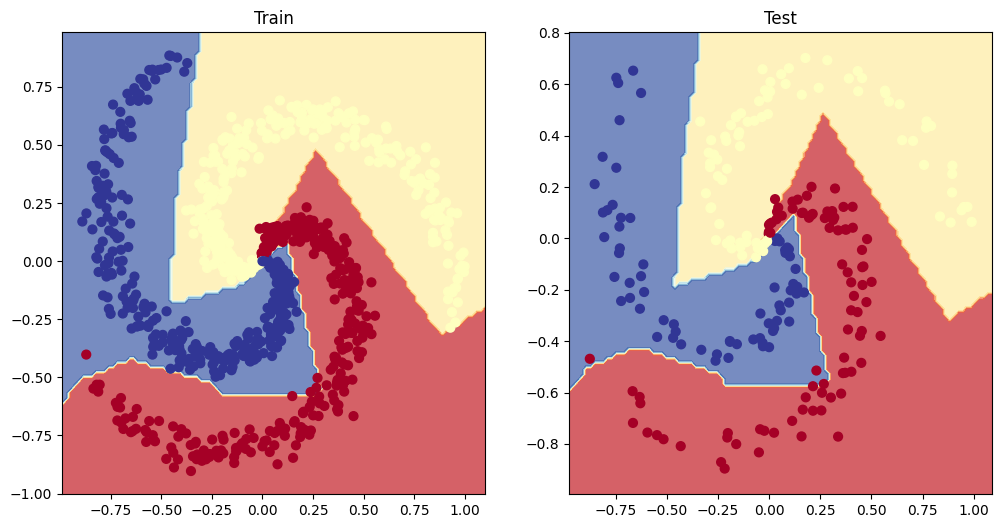

In [124]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_Spiral, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_Spiral, X_test, y_test)

Assignment 1.3: Building your own models for digit classification using the MNIST dataset

Implement 3 to 4 different models for digit classification of MNIST data by changing:
Network architecture: number of layers and activation functions
Hyperparameters such as hidden size, number of training epochs, batch size, learning rate, and optimizer

In [125]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor



In [126]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)
# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)



In [127]:
#create a dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

next(iter(train_dataloader))[0].shape

print(len(train_data))
print(len(test_data))



60000
10000


In [128]:
from torch import nn

class model_MNIST0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784, out_features=10),
            nn.Linear(in_features=10, out_features=10),
            nn.Linear(in_features=10, out_features=10)
        )
    def forward(self, x):
        return self.linear_stack(x)
    


In [129]:
import torchmetrics

def accuracy_fn(y_true, y_pred, num_classes=10):
    accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)
    acc = accuracy(y_pred, y_true)  
    return acc

In [130]:
def learn(model, loss_fn, optimizer, train_loader, test_loader, epochs=100):
    torch.manual_seed(0)

    # Lists to store values for each epoch
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()

        train_loss = 0
        test_loss = 0
        train_acc = 0
        test_acc = 0

        # Training Loop
        for batch_x, batch_y in train_loader:
            y_logits = model(batch_x)  # Don't apply softmax here
            loss = loss_fn(y_logits, batch_y)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = torch.softmax(y_logits, dim=1)
            acc = accuracy_fn(y_true=batch_y, y_pred=y_pred.argmax(dim=1))
            train_acc += acc

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)

        model.eval()
        with torch.inference_mode():
            for test_batch_x, test_batch_y in test_loader:
                test_logits = model(test_batch_x)  # Don't apply softmax here
                test_loss += loss_fn(test_logits, test_batch_y).item()

                test_preds = torch.softmax(test_logits, dim=1)  # Apply softmax for accuracy only
                test_acc += accuracy_fn(test_batch_y, test_preds.argmax(dim=1))

        test_loss /= len(test_loader)
        test_acc /= len(test_loader)

        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}, Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    return train_losses, train_accuracies, test_losses, test_accuracies


In [131]:
model0 = model_MNIST0()
loss_fn0 = nn.CrossEntropyLoss()
optimizer0 = torch.optim.Adam(model0.parameters(), lr=0.1)

In [132]:
num_epochs= 3
model0_train_loss, model0_train_acc, model0_val_loss, model0_val_acc = learn(model0,loss_fn0, optimizer0, train_dataloader,test_dataloader, num_epochs)

Epoch 1: Train Loss: 4.26500, Train Acc: 0.74, Test Loss: 0.72816, Test Acc: 0.80
Epoch 2: Train Loss: 4.23209, Train Acc: 0.78, Test Loss: 88.16420, Test Acc: 0.57
Epoch 3: Train Loss: 2.50438, Train Acc: 0.81, Test Loss: 0.88878, Test Acc: 0.81


Model 2
adding non linearity

In [144]:

class model_MNIST1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784, out_features=120),
            nn.LeakyReLU(),
            nn.Linear(in_features=120, out_features=120),
            nn.LeakyReLU(),
            nn.Linear(in_features=120, out_features=10)
        )
    def forward(self, x):
        return self.linear_stack(x)
    

In [145]:
#Keeping loss and optimizer the same to see how changes in the layers affect the model
model1 = model_MNIST1()
loss_fn1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.1)


In [146]:
#Train model 
model1_train_loss, model1_train_acc, model1_val_loss, model1_val_acc = learn(model1,loss_fn1, optimizer1, train_dataloader,test_dataloader, num_epochs)

Epoch 1: Train Loss: 9.35434, Train Acc: 0.67, Test Loss: 7.32569, Test Acc: 0.81
Epoch 2: Train Loss: 9.37848, Train Acc: 0.79, Test Loss: 9.95191, Test Acc: 0.79
Epoch 3: Train Loss: 13.27355, Train Acc: 0.82, Test Loss: 16.32192, Test Acc: 0.81


Nonlinear model performs much worse than linear model (Skriv om detta i inlämning)

Model 3 Adding convolutional layers

In [136]:

class model_MNIST2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                      out_channels=10, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.Conv2d(in_channels=10, 
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2,
                         stride=2), # default stride value is same as kernel_size
            nn.Conv2d(10, 10, 3, padding=1),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.MaxPool2d(2),
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=10*7*7, 
                      out_features=10)
        )
    def forward(self, x):
        return self.conv_stack(x)
    

In [137]:
#Keeping loss and optimizer the same to see how changes in the layers affect the model
model2 = model_MNIST2()
loss_fn2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.1)

model2_train_loss, model2_train_acc, model2_val_loss, model2_val_acc = learn(model2,loss_fn2, optimizer2, train_dataloader,test_dataloader, num_epochs)


Epoch 1: Train Loss: 23.22255, Train Acc: 0.88, Test Loss: 0.15468, Test Acc: 0.95
Epoch 2: Train Loss: 0.16419, Train Acc: 0.95, Test Loss: 0.16517, Test Acc: 0.95
Epoch 3: Train Loss: 0.16711, Train Acc: 0.96, Test Loss: 0.16495, Test Acc: 0.96


In [138]:

class model_MNIST3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                      out_channels=10, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=10, 
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2), # default stride value is same as kernel_size
            nn.Conv2d(10, 10, 3, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(in_features=10*7*7, 
                      out_features=10)
        )
    def forward(self, x):
        return self.conv_stack(x)
    

In [139]:
#Keeping loss and optimizer the same to see how changes in the layers affect the model
model3 = model_MNIST3()
loss_fn3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.1)

model3_train_loss, model3_train_acc, model3_val_loss, model3_val_acc = learn(model3,loss_fn3, optimizer3, train_dataloader,test_dataloader, num_epochs)


Epoch 1: Train Loss: 2.38139, Train Acc: 0.10, Test Loss: 2.33722, Test Acc: 0.09
Epoch 2: Train Loss: 2.31434, Train Acc: 0.10, Test Loss: 2.31547, Test Acc: 0.10
Epoch 3: Train Loss: 2.31424, Train Acc: 0.10, Test Loss: 2.30993, Test Acc: 0.10


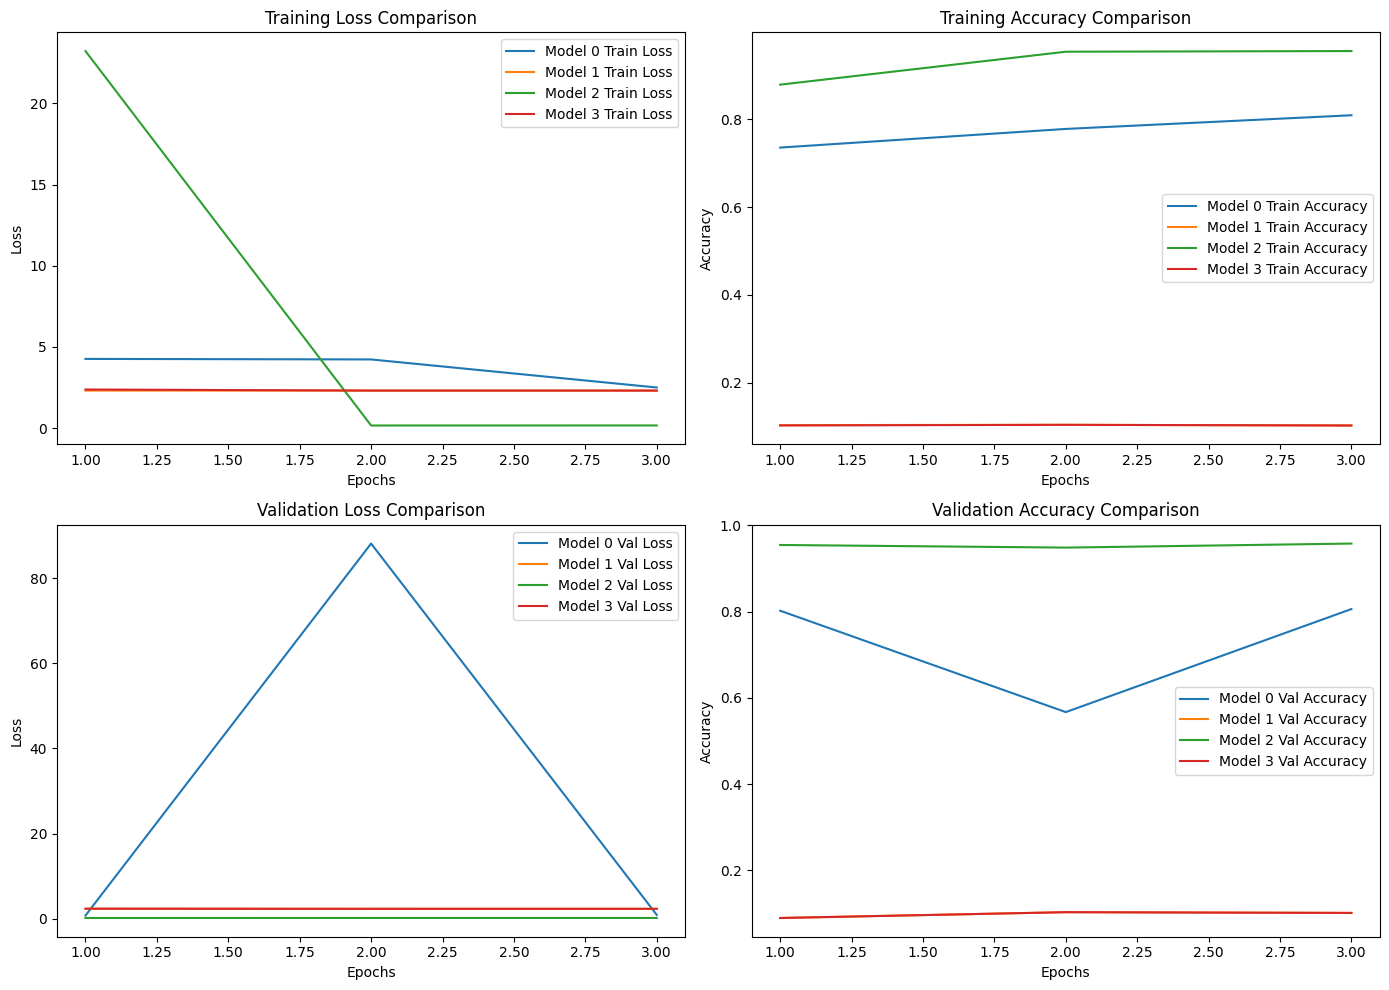

In [140]:
import matplotlib.pyplot as plt

# Example lists for storing accuracy and loss for each model
epochs = range(1, num_epochs + 1)  # The number of epochs

# Example plotting function to compare models
def plot_model_comparisons():
    plt.figure(figsize=(14, 10))

    # Plot Training Loss for all models
    plt.subplot(2, 2, 1)
    plt.plot(epochs, model0_train_loss, label='Model 0 Train Loss')
    plt.plot(epochs, model1_train_loss, label='Model 1 Train Loss')
    plt.plot(epochs, model2_train_loss, label='Model 2 Train Loss')
    plt.plot(epochs, model3_train_loss, label='Model 3 Train Loss')
    plt.title('Training Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy for all models
    plt.subplot(2, 2, 2)
    plt.plot(epochs, model0_train_acc, label='Model 0 Train Accuracy')
    plt.plot(epochs, model1_train_acc, label='Model 1 Train Accuracy')
    plt.plot(epochs, model2_train_acc, label='Model 2 Train Accuracy')
    plt.plot(epochs, model3_train_acc, label='Model 3 Train Accuracy')
    plt.title('Training Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Validation Loss for all models
    plt.subplot(2, 2, 3)
    plt.plot(epochs, model0_val_loss, label='Model 0 Val Loss')
    plt.plot(epochs, model1_val_loss, label='Model 1 Val Loss')
    plt.plot(epochs, model2_val_loss, label='Model 2 Val Loss')
    plt.plot(epochs, model3_val_loss, label='Model 3 Val Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Validation Accuracy for all models
    plt.subplot(2, 2, 4)
    plt.plot(epochs, model0_val_acc, label='Model 0 Val Accuracy')
    plt.plot(epochs, model1_val_acc, label='Model 1 Val Accuracy')
    plt.plot(epochs, model2_val_acc, label='Model 2 Val Accuracy')
    plt.plot(epochs, model3_val_acc, label='Model 3 Val Accuracy')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_model_comparisons()
